<a href="https://colab.research.google.com/github/Anuradha-Athukorala/Eating-Disorder-Dataset---01/blob/main/new_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

re = pattern matching and text manipulation.

mat = creating visualizations



In [ ]:
# pip install scikit-learn==1.2.1

library version is a way to control and manage the dependencies of the project

In [ ]:
df = pd.read_excel('Dataset new.xlsx')

In [ ]:
df.head(5)

,Tweet Body,URL,Sentiment
0,sorry i didn’t respond for 2 weeks i was focus...,https://twitter.com/flwufflez/status/170656191...,Neutral
1,"only i can have an eating disorder, everyone e...",https://twitter.com/yurihaomoon/status/1706560...,Negative
2,having an eating disorder isn’t an excuse to b...,https://twitter.com/swiftcals/status/170670935...,Negative
3,everybody been telling me i’m getting to be an...,https://twitter.com/c0lormenii/status/17067096...,Neutral
4,I am very thin (people think I am anorexic). W...,\nhttps://twitter.com/greengecko119/status/131...,Negative


In [ ]:
df.dtypes

Tweet Body     object
URL            object
Sentiment      object
dtype: object

In [ ]:
df.columns

Index(['Tweet Body ', 'URL', 'Sentiment '], dtype='object')

In [ ]:
df = df.drop(['URL'], axis = 1)

In [ ]:
df.head(10)

,Tweet Body,Sentiment
0,sorry i didn’t respond for 2 weeks i was focus...,Neutral
1,"only i can have an eating disorder, everyone e...",Negative
2,having an eating disorder isn’t an excuse to b...,Negative
3,everybody been telling me i’m getting to be an...,Neutral
4,I am very thin (people think I am anorexic). W...,Negative
5,When did body positivity turn into making fun ...,Negative
6,calling myself Anorexic still feels like such ...,Neutral
7,before i was disordered i bought a dozen of th...,Neutral
8,"“Fuck this eating disorder, I can eat whatever...",Neutral
9,i still had a eating disorder here but it was ...,Neutral


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


prepare the code to handle text data effectively,tokenizing sentences and removing common, less important words.

In [ ]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 3.3 MB/s eta 0:00:00


converting emoji codes to actual emojis.

In [ ]:
import emoji

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove links
    text = ' '.join([word for word in text.split() if not word.startswith('@')])  # Remove mentions (words starting with '@')
    text = re.sub(r'\$\S+', '', text)  # Remove currency symbols
    text = re.sub(r'\d{10}', '', text)  # Remove contact numbers
    text = re.sub(r'\d{1,2}[-/]\d{1,2}[-/]\d{2,4}', '', text)  # Remove dates
    text = re.sub(r'\S+@\S+', '', text)  # Remove emails
    text = emoji.demojize(text) # Remove emojis using the emoji library
    tokens = text.split()
    tokens = [word for word in tokens if len(word) > 2]# Remove short words (length <= 2)
    tokens = [word.lower() for word in tokens if word.isalnum()] # Tokenization, lowercase, and removing stopwords
    # tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

In [ ]:
df['processed_content'] = df['Tweet Body '].apply(preprocess_text)

In [ ]:
df.head(10)

,Tweet Body,Sentiment,processed_content
0,sorry i didn’t respond for 2 weeks i was focus...,Neutral,sorry respond for weeks was focused eating dis...
1,"only i can have an eating disorder, everyone e...",Negative,only can have eating everyone else deserves
2,having an eating disorder isn’t an excuse to b...,Negative,having eating disorder excuse stupid
3,everybody been telling me i’m getting to be an...,Neutral,everybody been telling getting unhealthy skinn...
4,I am very thin (people think I am anorexic). W...,Negative,very thin think when was thought everyone view...
5,When did body positivity turn into making fun ...,Negative,when did body positivity turn into making fun ...
6,calling myself Anorexic still feels like such ...,Neutral,calling myself anorexic still feels like such ...
7,before i was disordered i bought a dozen of th...,Neutral,before was disordered bought dozen these and h...
8,"“Fuck this eating disorder, I can eat whatever...",Neutral,this eating can eat whatever
9,i still had a eating disorder here but it was ...,Neutral,still had eating disorder here but was not bad...


In [ ]:
print(df['Sentiment '].value_counts())

Negative     489
Neutral      432
Positive      97
Neutral       14
Negative       6
Name: Sentiment , dtype: int64


In [ ]:
print(df['Sentiment '].unique())

['Neutral' 'Negative' 'Positive' 'Neutral ' 'Negative ']


In [ ]:
df = df.replace(to_replace='Neutral ', value='Neutral')
df = df.replace(to_replace='Negative ', value='Negative')

In [ ]:
print(df['Sentiment '].value_counts())

Negative    495
Neutral     446
Positive     97
Name: Sentiment , dtype: int64


In [ ]:
x = df['Tweet Body ']
y = df['Sentiment ']

In [ ]:
y.value_counts()

Negative    495
Neutral     446
Positive     97
Name: Sentiment , dtype: int64

In [ ]:
pip install imbalanced-learn

library specifically designed to address and deal with imbalanced datasets.

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
#oversampling the minority class in an imbalanced dataset.
from collections import Counter
#count the distribution of class labels in the dataset.
from sklearn.feature_extraction.text import TfidfVectorizer
#converting text data into numerical features.

print("Class distribution before SMOTE:", Counter(y))
#prints the distribution of class labels in the original dataset using the Counter function.
tfidf_vectorizer = TfidfVectorizer()
x_tfidf = tfidf_vectorizer.fit_transform(x)

smote = SMOTE(sampling_strategy='auto', random_state=42)
#which automatically determines the number of synthetic samples to create.
x_resampled, y_resampled = smote.fit_resample(x_tfidf, y)

print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution before SMOTE: Counter({'Negative': 495, 'Neutral': 446, 'Positive': 97})
Class distribution after SMOTE: Counter({'Neutral': 495, 'Negative': 495, 'Positive': 495})


 It balances the dataset by generating smote help improve the performance of machine learning models on such tasks.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

Define the SVM classifier

In [ ]:
svm_classifier = SVC(random_state=42)

# Hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'class_weight':[None, 'balanced']
}

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
#used GridSearchCV to perform a grid search for the best hyperparameters within the specified parameter grid.
#3 fold cross validation.

# Best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters on the full training dataset
final_svm_classifier = SVC(**best_params, random_state=42)
final_svm_classifier.fit(X_train, y_train)

# Predict sentiment on the testing dataset
y_pred = final_svm_classifier.predict(X_test)

# Evaluate the final model on the testing dataset
report = classification_report(y_test, y_pred)
print("Classification Report on Testing Data:")
print(report)

Best Hyperparameters: {'C': 10, 'class_weight': None, 'kernel': 'rbf'}
Classification Report on Testing Data:
              precision    recall  f1-score   support

    Negative       0.58      0.66      0.62        82
     Neutral       0.70      0.63      0.66       103
    Positive       1.00      0.99      1.00       112

    accuracy                           0.77       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.78      0.77      0.78       297



Define the Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid to search
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with cross-validation on the training data
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=3)
grid_search_dt.fit(X_train, y_train)

# Best hyperparameters from the grid search
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_dt)

# Train the final Decision Tree model with the best hyperparameters
final_dt_classifier = DecisionTreeClassifier(**best_params_dt)
final_dt_classifier.fit(X_train, y_train)

# Predict classes on the testing dataset
y_pred_dt = final_dt_classifier.predict(X_test)

# Evaluate the final Decision Tree model on the testing dataset
report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report for Decision Tree on Testing Data:")
print(report_dt)

Best Hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report for Decision Tree on Testing Data:
              precision    recall  f1-score   support

    Negative       0.43      0.49      0.46        82
     Neutral       0.56      0.48      0.51       103
    Positive       0.82      0.86      0.84       112

    accuracy                           0.62       297
   macro avg       0.60      0.61      0.60       297
weighted avg       0.62      0.62      0.62       297



Define the Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter grid to search
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search with cross-validation on the training data
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters from the grid search
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Train the final Random Forest model with the best hyperparameters
final_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
final_rf_classifier.fit(X_train, y_train)

# Predict classes on the testing dataset
y_pred_rf = final_rf_classifier.predict(X_test)

# Evaluate the final Random Forest model on the testing dataset
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest on Testing Data:")
print(report_rf)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Classification Report for Random Forest on Testing Data:
              precision    recall  f1-score   support

    Negative       0.53      0.66      0.59        82
     Neutral       0.68      0.60      0.64       103
    Positive       0.99      0.92      0.95       112

    accuracy                           0.74       297
   macro avg       0.73      0.73      0.73       297
weighted avg       0.76      0.74      0.74       297



Define the Multinomial Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

# Train the Multinomial Naive Bayes model
nb_classifier.fit(X_train, y_train)

# Predict classes on the testing dataset
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the Multinomial Naive Bayes model on the testing dataset
report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report for Multinomial Naive Bayes on Testing Data:")
print(report_nb)

Classification Report for Multinomial Naive Bayes on Testing Data:
              precision    recall  f1-score   support

    Negative       0.58      0.63      0.60        82
     Neutral       0.72      0.50      0.59       103
    Positive       0.81      0.98      0.89       112

    accuracy                           0.72       297
   macro avg       0.70      0.71      0.70       297
weighted avg       0.72      0.72      0.71       297



Create the ensemble model

In [ ]:
from sklearn.ensemble import VotingClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

svm_classifier = SVC(C=10, kernel='rbf',class_weight = None)
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=300)

# Create the ensemble model using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('svm', svm_classifier),
    ('Naive bayes', nb_classifier),
    ('random_forest', rf_classifier)
], voting='hard')

# Train
ensemble_classifier.fit(X_train, y_train)

# Predict classes on the testing dataset
y_pred_ensemble = ensemble_classifier.predict(X_test)

# Evaluate on the testing dataset
report_ensemble = classification_report(y_test, y_pred_ensemble)
print("Classification Report for Ensemble Model on Testing Data:")
print(report_ensemble)

Classification Report for Ensemble Model on Testing Data:
              precision    recall  f1-score   support

    Negative       0.56      0.70      0.62        82
     Neutral       0.71      0.60      0.65       103
    Positive       1.00      0.97      0.99       112

    accuracy                           0.77       297
   macro avg       0.76      0.76      0.75       297
weighted avg       0.78      0.77      0.77       297



Class 0: Negative sentiment

Class 1: Neutral sentiment

Class 2: Positive sentiment




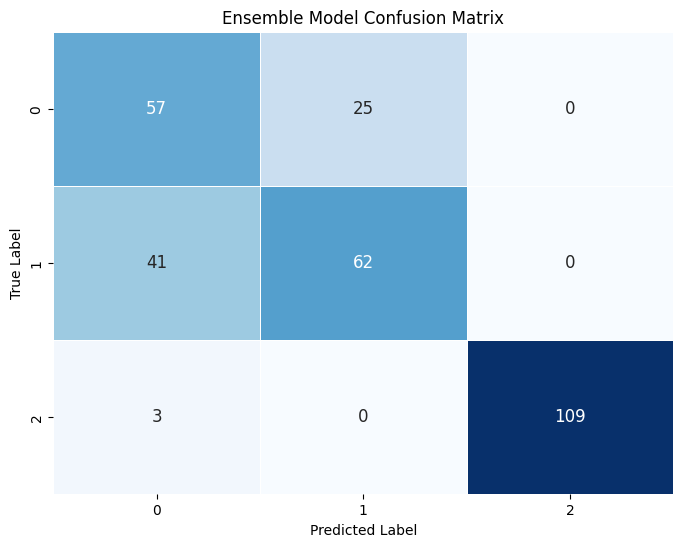

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Import the Matplotlib library for data visualization.
import seaborn as sns
#Import the Seaborn library used to create visually appealing statistical graphics.

conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 12}, linewidths=0.5)
plt.title("Ensemble Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

True, Positive = model correctly predicted the class [55,62,109]

False, Positive = model made a type I error by incorrectly classifying something as positive or neutral [41,0]

False, Negative = model failed to recognize a positive or neutral sentiment [27,0,3,0

In [ ]:
pip install joblib

useful library for working with large data and complex piplines.

In [ ]:
import joblib

joblib.dump(ensemble_classifier, 'ensemble_model.joblib')

['ensemble_model.joblib']

the way of can store the model for future use without retraining it.

In [ ]:
df.to_csv('processed_datasetnew.csv')

In [ ]:
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

later use in text processing or nlp tasks.